In [3]:
from google.colab import files
uploded=files.upload()

Saving advertising.csv to advertising.csv


In [2]:
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

In [4]:
df=pd.read_csv('advertising.csv')

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.duplicated().any()

False

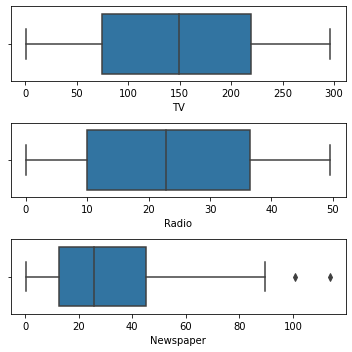

In [9]:
fig,axs=plt.subplots(nrows=3);
fig.set_size_inches(5,5)
plot1=sns.boxplot(x=df['TV'],ax=axs[0])
plot2=sns.boxplot(x=df['Radio'],ax=axs[1])
plot3=sns.boxplot(x=df['Newspaper'],ax=axs[2])
plt.tight_layout();

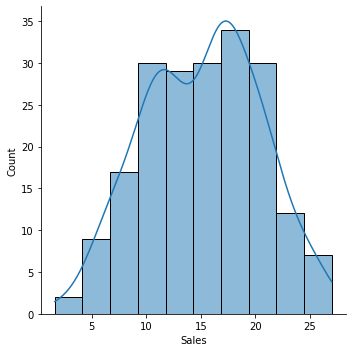

In [10]:
sns.displot(x=df['Sales'], kde=True)

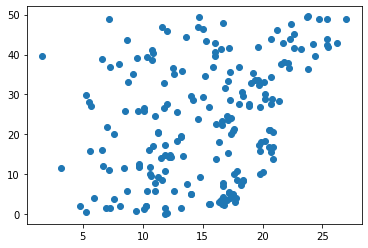

In [11]:
plt.scatter(x=df['Sales'],y=df['Radio'])

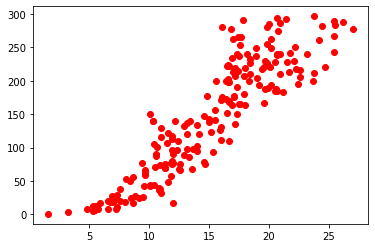

In [21]:
plt.scatter(x=df['Sales'],y=df['TV'],color="red")


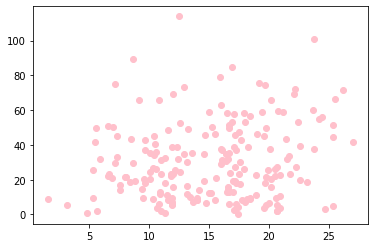

In [19]:
plt.scatter(x=df['Sales'],y=df['Newspaper'],color="pink")

In [22]:
corr=df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


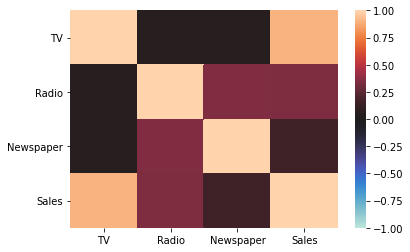

In [ ]:
sns.heatmap(corr,vmin=-1,vmax=1,center=0)

In [24]:
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression;


In [31]:
x=df[['TV']]
y=df['Sales']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)


In [27]:
slr=LinearRegression()
slr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_test_pred=slr.predict(x_test)

In [29]:
ans=pd.DataFrame({'Actual':y_test,'Pred':y_test_pred})
ans.head()

,Actual,Pred
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392


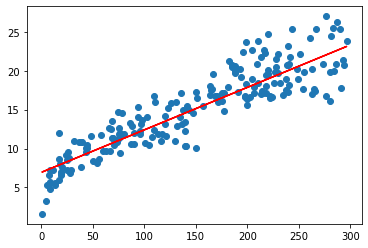

In [35]:
y_pred=slr.predict(x);
plt.scatter(x=x,y=y);
plt.plot(x,y_pred,color="red")

In [41]:
#value of m and c
c=slr.intercept_;
m=slr.coef_
print(c,m)

6.948683200001357 [0.05454575]


In [55]:
from sklearn import metrics;


In [54]:
meanAbsErr=metrics.mean_absolute_error(y_test,y_test_pred)
meanSqErr=metrics.mean_squared_error(y_test,y_test_pred)
rootMeanSqErr=np.sqrt(meanSqErr)
print("Mean Absolute Error: ",meanAbsErr)
print("Mean Squared Error: ",meanSqErr)
print("Root Mean Squared Error: ",rootMeanSqErr)

Mean Absolute Error:  1.6480589869746525
Mean Squared Error:  4.077556371826948
Root Mean Squared Error:  2.019296008966231
